### Моделирование по колебаниям: "Выпрямление с фильтрацией"

##### Петренко Людмила, Кусайкина Елизавета М32041

In [115]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import time

#### Описание работы:
Выпрямление - способ получения постоянного тока, например, для питания радиотехнических устройств.

Объект выпрямления - электрическое напряжение переменного тока.

Цель фильтрации при выпрямлении - ослабить переменную составляющую выпрямленного напряжения.

В этой работе требовалось cмоделировать работу фильтра-выпрямителя. На входе фильтра действует напряжение E(t) одно- или двухполупериодное, полученное из переменного синусоидального напряжения. Для ослабления переменной составляющей в схеме фильтра имеется реактивный элемент: конденсатор емкостью С. Фильтр работает на нагрузку сопротивлением Rн.

![alt text](straightening_schem.png "Title")

Параметры установки:

1. Внутреннее сопротивление источника напряжения - r
2. Сопротивление нагрузки - R
3. Емкость конденсатора - C

На входе может действовать:

E_one - однополупериодное выпрямленное напряжение, $E(t) = \sin(t) $, при $\sin(t) > 0 $ иначе $E(t) = 0 $ 

E_two - двухполупериодное выпрямленное напряжение, $E(t) = |\sin(t)| $

In [116]:
def E_one_draw(t):
    u_list = []
    for i in t:
        if np.sin(i) > 0:
            u_list.append(np.sin(i))
        else:
            u_list.append(0)
    return u_list
    
def E_one(t):
    if np.sin(t) > 0:
        return np.sin(t)
    else:
        return 0

E_two = lambda t : abs(np.sin(t))

Выходное, выпряпленное напряжение можно рассчитать с помощью дифференциального уравнения, описывающего работу фильтра:

$\displaystyle \frac{\partial u(t)}{\partial t}$ = $\frac{1}{rC} $ [$E(t) $ - (1 + $\frac{r}{R} $) $u(t) $]

$u(0) = 0$ - начальное условие

Решим задачу Коши:

<blockquote> 1. Запишем задачу Коши в удобном для работы виде

Пусть $w = $ - $\frac{1}{rC} $ - $\frac{1}{RC} $ и $p = \frac{1}{rC} $

$\displaystyle \frac{\partial u(t)}{\partial t}$ = $wu(t) + pE(t) $ , $u(0) = 0 $ => $f(t, u) = wu + pE(t) $
</blockquote>

<blockquote> 2. Воспользуемся методом Рунге-Кутта для нахождения приближенного решения дифференциального уравнения

$U_{i+1} = U_i + hf(t_i + \frac{h}{2}, U_i + \frac{h}{2}f(t_i, U_i)) $, $i = 0..N $

$U_0 = 0 $
</blockquote>

In [117]:
t = np.linspace(0, 20*np.pi, 1000)

def U_i(i, f, U):
    h = t[i+1] - t[i]
    return U[i] + h*f(t[i] + h/2, U[i] + (h/2)*f(t[i], U[i]))

Задание значений параметров и отрисовка графиков решений:

Значения параметров можно менять, передвигая движок. Результаты появятся ниже


FloatSlider(value=0.1, continuous_update=False, description='r', max=10.0, step=0.01)

FloatSlider(value=100.0, continuous_update=False, description='R', max=1000.0, step=1.0)

FloatSlider(value=1000.0, continuous_update=False, description='C', max=1000.0, step=1.0)

r = 0.1, R = 100.0, C = 390.0


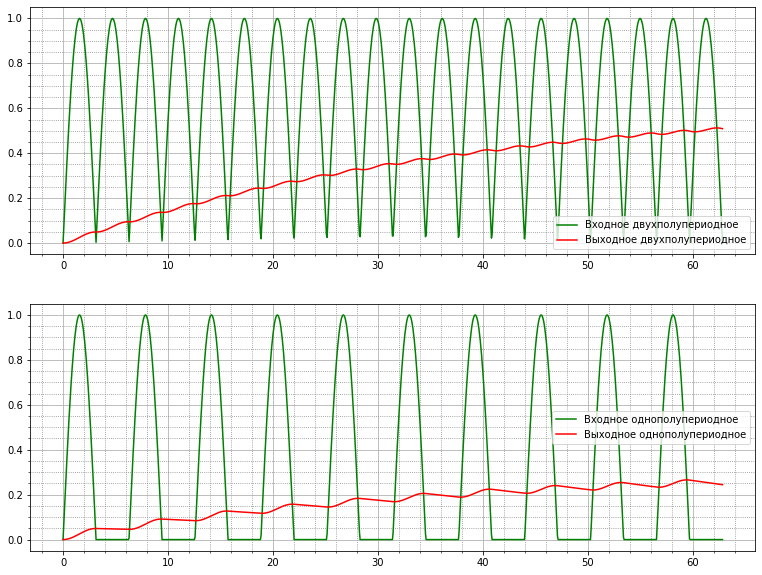

r = 0.1, R = 100.0, C = 709.0


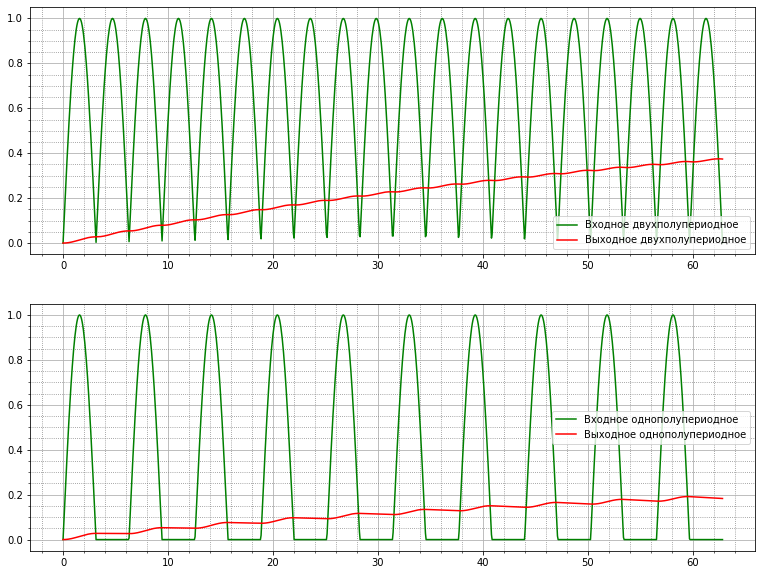

r = 4.0, R = 100.0, C = 709.0


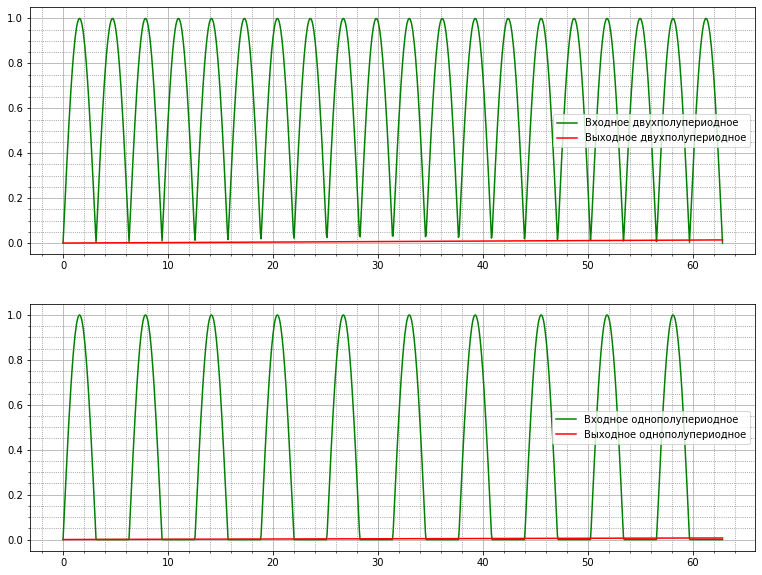

In [118]:
from IPython.display import display
from ipywidgets import FloatSlider

fSlider1 = FloatSlider(value=0.1, min=0.0, max=10.0, step=0.01, description='r',
    continuous_update=False, orientation='horizontal')
fSlider2 = FloatSlider(value=100.0, min=0.0, max=1000.0, step=1.0, description='R',
    continuous_update=False, orientation='horizontal')
fSlider3 = FloatSlider(value=1000.0, min=0.0, max=1000.0, step=1.0, description='C',
    continuous_update=False, orientation='horizontal')

def animate(b):
    print(f'r = {fSlider1.value}, R = {fSlider2.value}, C = {fSlider3.value}')
    fig = plt.figure(figsize=(13,10))
    axs = fig.subplots(2,1)

    axs[0].minorticks_on()
    axs[0].grid(True, which='both')
    axs[0].grid(which='minor', color='gray', linestyle=':')
    axs[1].minorticks_on()
    axs[1].grid(True, which='both')
    axs[1].grid(which='minor', color='gray', linestyle=':')

    w = -1/(fSlider1.value*fSlider3.value) - 1/(fSlider3.value*fSlider2.value)
    p = 1/(fSlider1.value*fSlider3.value)

    f_one = lambda t, u : w*u + p*E_one(t)
    f_two = lambda t, u : w*u + p*E_two(t)

    U_one = []
    U_one.append(0)
    U_two = []
    U_two.append(0)
    for i in range(999):
        U_one.append(U_i(i, f_one, U_one))
        U_two.append(U_i(i, f_two, U_two))
    
    axs[1].plot(t, E_one_draw(t), color='green', label="Входное однополупериодное")
    axs[1].plot(t, U_one, color='red', label="Выходное однополупериодное")
    axs[0].plot(t, E_two(t), color='green', label="Входное двухполупериодное")
    axs[0].plot(t, U_two, color='red', label="Выходное двухполупериодное")

    axs[0].legend()
    axs[1].legend()

print("Значения параметров можно менять, передвигая движок. Результаты появятся ниже")
fSlider1.observe(animate, names='value')
display(fSlider1)
fSlider2.observe(animate, names='value')
display(fSlider2)
fSlider3.observe(animate, names='value')
display(fSlider3)

На основе полученных графиков напряжений на фильтре можно сделать некоторые выводы:

1. Чем больше емкость конденсатора, тем качественнее фильтрация. То есть, чем больше реактивная составляющая цепи, тем ближе напряжение будет к постоянному.
2. Чем меньше сопротивление нагрузки, тем качественнее фильтрация. То есть, чем меньше активная составляющая цепи, тем ближе напряжение к постоянному.
3. Уменьшение внутреннего сопротивления источника выпрямленного напряжения негативно повлияло на качество фильтрации. 